In [383]:
!pip install pandas
!pip install scikit-learn

In [384]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [385]:
df = pd.read_csv("bank_transactions_data_2.csv")

In [386]:
print(df.shape)

(10000, 15)


In [387]:
print(df.duplicated().sum())

0


In [388]:
df.head()

transaction_id user_id     amount transaction_type device_type   location  \
0         T00001    U255   43574.75           online      tablet  Singapore   
1         T00002    U661  104351.51           online     desktop  Singapore   
2         T00003    U325  211864.52              POS      tablet      Dubai   
3         T00004    U327  280370.03           online      tablet    Kolkata   
4         T00005    U143  216222.76           online     desktop      Delhi   

  time_of_day  transaction_hour  is_international  previous_transactions  \
0     morning                 9                 1                    115   
1       night                 1                 1                     15   
2   afternoon                13                 1                    135   
3   afternoon                15                 0                    129   
4     evening                17                 0                     11   

   failed_transactions  account_age_days  is_fraud        Date  \
0                    3                35         0  04/09/2017   
1                    4               598         1  18/02/2020   
2                   10               550         1  29/05/2020   
3                   10                42         1  18/07/2022   
4                    1               791         0  05/07/2021   

  Transaction Platform  
0              PhonePe  
1                 GPay  
2             BharatPe  
3                 GPay  
4             BharatPe

In [389]:
!pip install matplotlib

In [390]:
import matplotlib.pyplot as plt
df['is_fraud'].value_counts()

is_fraud
1    5628
0    4372
Name: count, dtype: int64

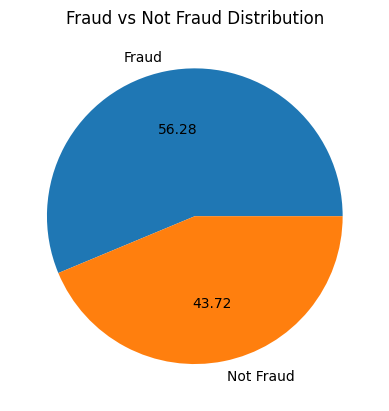

In [391]:
plt.title("Fraud vs Not Fraud Distribution")
plt.pie(df['is_fraud'].value_counts(),labels=['Fraud','Not Fraud'], autopct="%0.2f")
plt.show()

In [392]:
df.columns

Index(['transaction_id', 'user_id', 'amount', 'transaction_type',
       'device_type', 'location', 'time_of_day', 'transaction_hour',
       'is_international', 'previous_transactions', 'failed_transactions',
       'account_age_days', 'is_fraud', 'Date', 'Transaction Platform'],
      dtype='object')

In [393]:
list(df.columns)

['transaction_id',
 'user_id',
 'amount',
 'transaction_type',
 'device_type',
 'location',
 'time_of_day',
 'transaction_hour',
 'is_international',
 'previous_transactions',
 'failed_transactions',
 'account_age_days',
 'is_fraud',
 'Date',
 'Transaction Platform']

In [394]:
!pip install seaborn
import seaborn as sns

<Axes: xlabel='transaction_hour', ylabel='Count'>

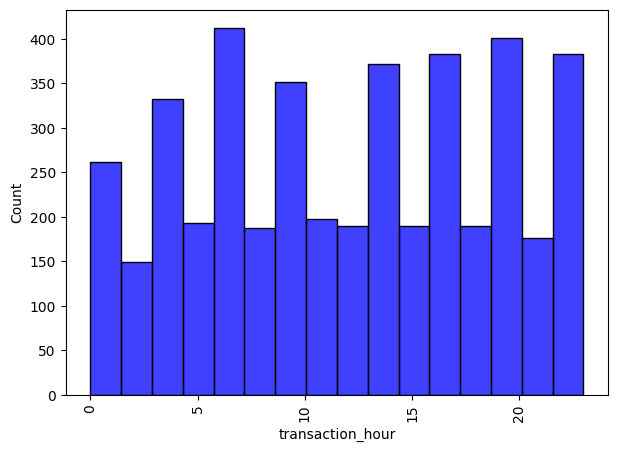

In [395]:
plt.figure(figsize = (7,5))
plt.xticks(rotation='vertical')
sns.histplot(df[df['is_fraud'] == 0]['transaction_hour'],color='blue')

<Axes: xlabel='transaction_hour', ylabel='Count'>

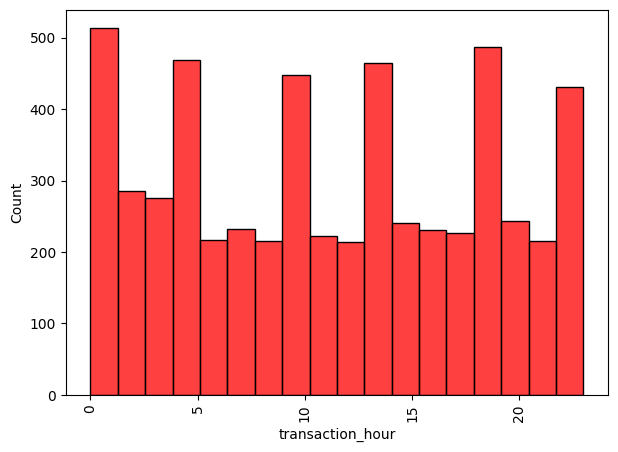

In [396]:
plt.figure(figsize = (7,5))
plt.xticks(rotation='vertical')
sns.histplot(df[df['is_fraud'] == 1]['transaction_hour'],color='red')

<Axes: xlabel='location', ylabel='Count'>

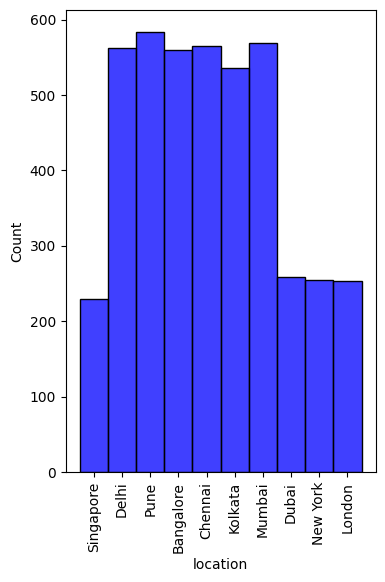

In [397]:
plt.figure(figsize = (4,6))
plt.xticks(rotation='vertical')
sns.histplot(df[df['is_fraud'] == 0]['location'],color='blue')

<Axes: xlabel='location', ylabel='Count'>

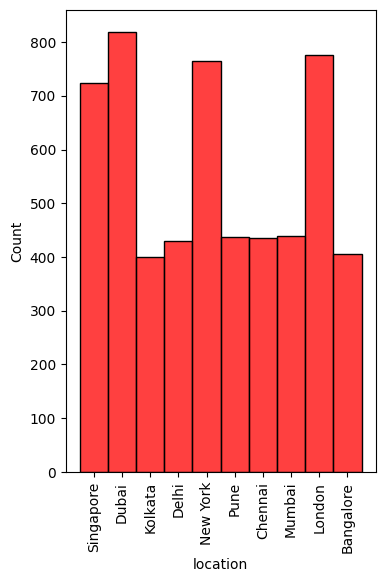

In [398]:
plt.figure(figsize = (4,6))
plt.xticks(rotation='vertical')
sns.histplot(df[df['is_fraud'] == 1]['location'],color='red')

In [399]:
fraud_df = df[df['is_fraud'] == 1] #Filters only fraud hours
fraud_df[['amount','location','transaction_hour','is_fraud']]

amount   location  transaction_hour  is_fraud
1     104351.51  Singapore                 1         1
2     211864.52      Dubai                13         1
3     280370.03    Kolkata                15         1
7      79802.98      Delhi                19         1
10    211166.34   New York                21         1
...         ...        ...               ...       ...
9991  224192.10    Chennai                 8         1
9992    9706.03     London                 3         1
9995  118355.73      Dubai                23         1
9996  126545.76      Delhi                 6         1
9999  227924.83     Mumbai                 1         1

[5628 rows x 4 columns]

In [400]:
fraud_df_1 = df[df['is_fraud'] == 0] #Filters only Non-Fraud hours
fraud_df_1[['amount','location','transaction_hour','is_fraud']]

amount   location  transaction_hour  is_fraud
0      43574.75  Singapore                 9         0
4     216222.76      Delhi                17         0
5     156210.96       Pune                15         0
6     139215.46  Bangalore                 4         0
8      60807.93    Chennai                10         0
...         ...        ...               ...       ...
9989   22519.77    Chennai                 1         0
9993    5291.13      Dubai                12         0
9994  221462.31      Delhi                15         0
9997    8905.02    Kolkata                23         0
9998   81748.84  Singapore                16         0

[4372 rows x 4 columns]

In [401]:
top_hours_1 = (
    fraud_df_1['transaction_hour'].
        value_counts().
        sort_values(ascending=False).
        head(10)
)
l1 = list(map(int,top_hours_1.index))
l2 = list(map(int,top_hours_1.values))

Final_Top_Hours_1 = pd.DataFrame({
    'Transaction-Hour': l1,
    'No. of Transactions': l2
})

Final_Top_Hours_1

Transaction-Hour  No. of Transactions
0                20                  218
1                 7                  216
2                22                  202
3                16                  200
4                11                  198
5                 6                  196
6                10                  193
7                 5                  193
8                18                  190
9                12                  190

Text(0, 0.5, 'No. of Transactions')

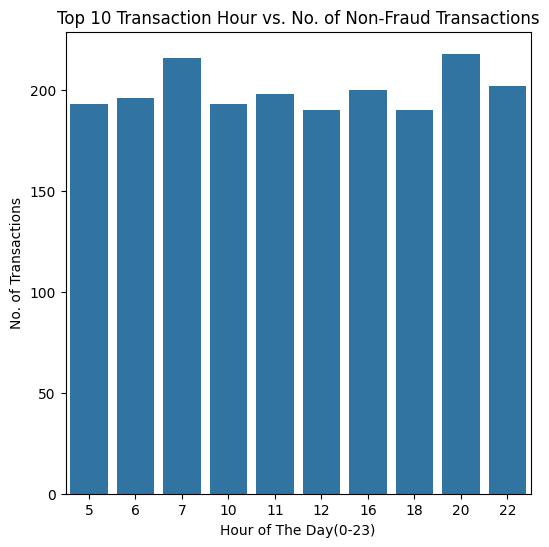

In [402]:
plt.figure(figsize=(6,6))
sns.barplot(x='Transaction-Hour', y='No. of Transactions', data = Final_Top_Hours_1)
plt.title('Top 10 Transaction Hour vs. No. of Non-Fraud Transactions')
plt.xlabel('Hour of The Day(0-23)')
plt.ylabel('No. of Transactions')

In [403]:
top_loc_1 = (
    fraud_df_1['location'].
        value_counts().
        sort_values(ascending=False).
        head(10)
)
l1 = list(map(str,top_loc_1.index))
l2 = list(map(int,top_loc_1.values))
Final_Top_Loc_1 = pd.DataFrame({
    'Location': l1,
    'No. of Transactions(Non-Fraud)': l2
})
Final_Top_Loc_1

Location  No. of Transactions(Non-Fraud)
0       Pune                             584
1     Mumbai                             569
2    Chennai                             565
3      Delhi                             562
4  Bangalore                             560
5    Kolkata                             536
6      Dubai                             259
7   New York                             254
8     London                             253
9  Singapore                             230

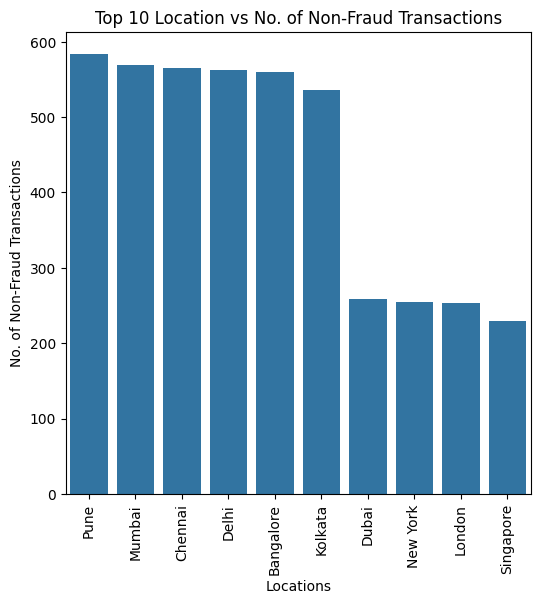

In [404]:
plt.figure(figsize=(6,6))
sns.barplot(x='Location',y='No. of Transactions(Non-Fraud)', data = Final_Top_Loc_1)
plt.title('Top 10 Location vs No. of Non-Fraud Transactions')
plt.xlabel('Locations')
plt.ylabel('No. of Non-Fraud Transactions')
plt.xticks(rotation='vertical')
plt.show() #Pune observed with Most Non-Fraud Transactions(584)

In [405]:
top_hours_1_rev = (
    fraud_df_1['transaction_hour'].
        value_counts().
        sort_values(ascending=True).
        head(5)
)
l1 = list(map(int,top_hours_1_rev.index))
l2 = list(map(int,top_hours_1_rev.values))

Final_Top_Hours_1_rev = pd.DataFrame({
    'Transaction-Hour': l1,
    'No. of Transactions': l2
})

Final_Top_Hours_1_rev

Transaction-Hour  No. of Transactions
0                 0                  127
1                 1                  135
2                 3                  146
3                 2                  149
4                 9                  159

Text(0, 0.5, 'No. of Transactions')

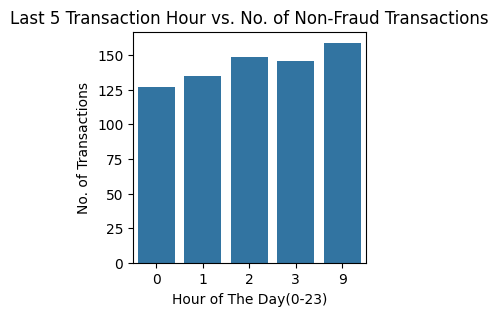

In [406]:
plt.figure(figsize=(3,3))
sns.barplot(x='Transaction-Hour', y='No. of Transactions', data = Final_Top_Hours_1_rev)
plt.title('Last 5 Transaction Hour vs. No. of Non-Fraud Transactions')
plt.xlabel('Hour of The Day(0-23)')
plt.ylabel('No. of Transactions')

In [407]:
top_loc_1_rev = (
    fraud_df_1['location'].
        value_counts().
        sort_values(ascending=True).
        head(5)
)
l1 = list(map(str,top_loc_1_rev.index))
l2 = list(map(int,top_loc_1_rev.values))

Final_Top_Loc_1_rev = pd.DataFrame({
    'Location': l1,
    'No. of Transactions(Non-Fraud)': l2
})
Final_Top_Loc_1_rev

Location  No. of Transactions(Non-Fraud)
0  Singapore                             230
1     London                             253
2   New York                             254
3      Dubai                             259
4    Kolkata                             536

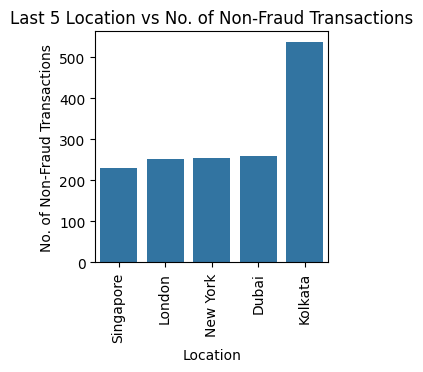

In [408]:
plt.figure(figsize=(3,3))
sns.barplot(x='Location', y='No. of Transactions(Non-Fraud)', data = Final_Top_Loc_1_rev)
plt.title('Last 5 Location vs No. of Non-Fraud Transactions')
plt.xticks(rotation='vertical')
plt.xlabel('Location')
plt.ylabel('No. of Non-Fraud Transactions')
plt.show() #Singapore observed with Least Non-Fraud Transactions(230)

In [409]:
top_hours = (
    fraud_df['transaction_hour'].
        value_counts().
        sort_values(ascending=False).
        head(10)
)
l1 = list(map(int,top_hours.index))
l2 = list(map(int,top_hours.values))
Final_Top_Hours = pd.DataFrame({
    'Transaction-Hour': l1,
    'No. of Transactions': l2
})
print(Final_Top_Hours)

   Transaction-Hour  No. of Transactions
0                 2                  286
1                 3                  275
2                 1                  257
3                 0                  256
4                19                  254
5                20                  243
6                14                  242
7                15                  240
8                 5                  239
9                18                  233


Text(0, 0.5, 'No. of Transactions')

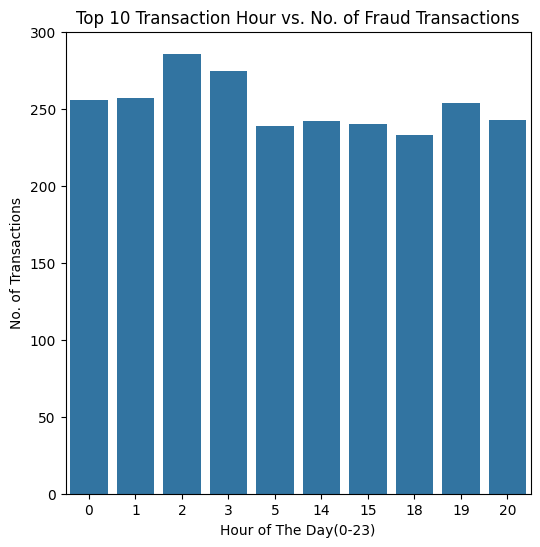

In [410]:
plt.figure(figsize=(6,6))
sns.barplot(x='Transaction-Hour', y='No. of Transactions', data = Final_Top_Hours)
plt.title('Top 10 Transaction Hour vs. No. of Fraud Transactions')
plt.xlabel('Hour of The Day(0-23)')
plt.ylabel('No. of Transactions')

In [411]:
top_loc = (
    fraud_df['location'].
        value_counts().
        sort_values(ascending=False).
        head(10)
)
l1 = list(map(str,top_loc.index))
l2 = list(map(int,top_loc.values))
Final_Top_Loc = pd.DataFrame({
    'Location': l1,
    'No. of Transactions(Fraud)': l2
})
Final_Top_Loc

Location  No. of Transactions(Fraud)
0      Dubai                         819
1     London                         775
2   New York                         765
3  Singapore                         723
4     Mumbai                         439
5       Pune                         437
6    Chennai                         436
7      Delhi                         429
8  Bangalore                         405
9    Kolkata                         400

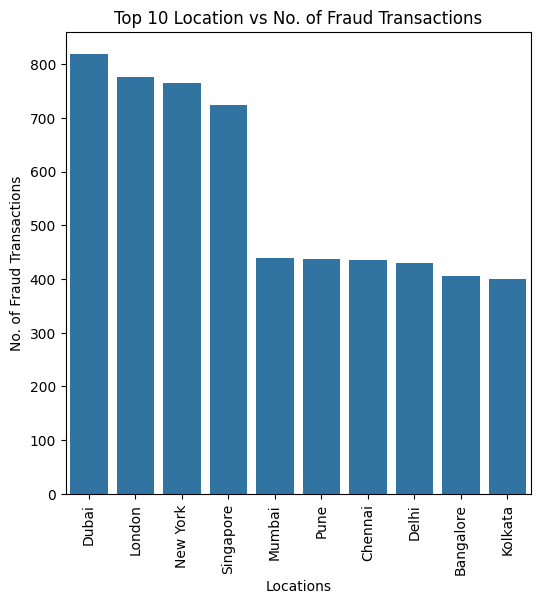

In [412]:
plt.figure(figsize=(6,6))
sns.barplot(x='Location',y='No. of Transactions(Fraud)', data = Final_Top_Loc)
plt.title('Top 10 Location vs No. of Fraud Transactions')
plt.xlabel('Locations')
plt.ylabel('No. of Fraud Transactions')
plt.xticks(rotation='vertical')
plt.show() #Dubai observed with Most Fraud Transactions(819)

In [413]:
top_hours_rev = (
    fraud_df['transaction_hour'].
        value_counts().
        sort_values(ascending=True).
        head(5)
)
l1 = list(map(int,top_hours_rev.index))
l2 = list(map(int,top_hours_rev.values))
Final_Top_Hours_rev = pd.DataFrame({
    'Transaction-Hour': l1,
    'No. of Transactions': l2
})
print(Final_Top_Hours_rev)

   Transaction-Hour  No. of Transactions
0                22                  205
1                12                  214
2                 8                  215
3                21                  216
4                 6                  217


Text(0, 0.5, 'No. of Transactions')

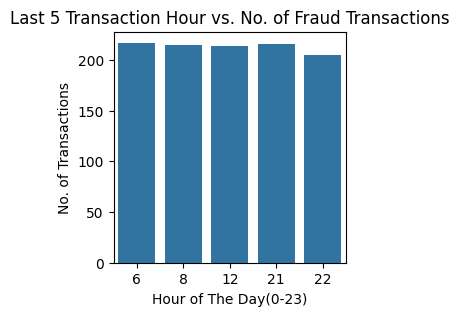

In [414]:
plt.figure(figsize=(3,3))
sns.barplot(x='Transaction-Hour', y='No. of Transactions', data = Final_Top_Hours_rev)
plt.title('Last 5 Transaction Hour vs. No. of Fraud Transactions')
plt.xlabel('Hour of The Day(0-23)')
plt.ylabel('No. of Transactions')

In [415]:
top_loc_rev = (
    fraud_df['location'].
        value_counts().
        sort_values(ascending=True).
        head(5)
)
l1 = list(map(str,top_loc_rev.index))
l2 = list(map(int,top_loc_rev.values))

Final_Top_Loc_rev = pd.DataFrame({
    'Location': l1,
    'No. of Transactions(Fraud)': l2
})
Final_Top_Loc_rev

Location  No. of Transactions(Fraud)
0    Kolkata                         400
1  Bangalore                         405
2      Delhi                         429
3    Chennai                         436
4       Pune                         437

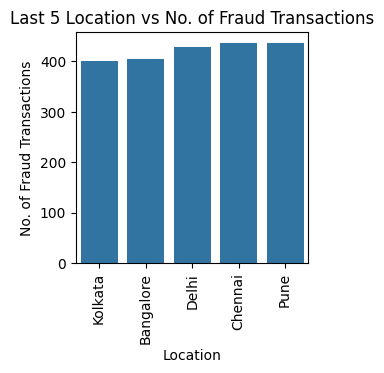

In [416]:
plt.figure(figsize=(3,3))
sns.barplot(x='Location', y='No. of Transactions(Fraud)', data = Final_Top_Loc_rev)
plt.title('Last 5 Location vs No. of Fraud Transactions')
plt.xticks(rotation='vertical')
plt.xlabel('Location')
plt.ylabel('No. of Fraud Transactions')
plt.show() #Kolkata observed with least Fraud Transactions(400)

In [417]:
#Model Building
import pickle
from sklearn.metrics import accuracy_score

In [418]:
df.columns

Index(['transaction_id', 'user_id', 'amount', 'transaction_type',
       'device_type', 'location', 'time_of_day', 'transaction_hour',
       'is_international', 'previous_transactions', 'failed_transactions',
       'account_age_days', 'is_fraud', 'Date', 'Transaction Platform'],
      dtype='object')

In [419]:
df['Date'] = df['Date'].str.replace('/','').astype(int)

In [420]:
df['Date']

0        4092017
1       18022020
2       29052020
3       18072022
4        5072021
          ...   
9995    30092017
9996    31102020
9997     9012018
9998     6072016
9999    17042023
Name: Date, Length: 10000, dtype: int64

In [421]:
df.corr(numeric_only=True)

amount  transaction_hour  is_international  \
amount                 1.000000          0.003716          0.001583   
transaction_hour       0.003716          1.000000          0.005081   
is_international       0.001583          0.005081          1.000000   
previous_transactions -0.001661         -0.003468          0.007678   
failed_transactions    0.009404         -0.006203          0.006666   
account_age_days       0.000637         -0.007688         -0.003657   
is_fraud               0.397843         -0.053115          0.322809   
Date                   0.011816          0.010489         -0.017530   

                       previous_transactions  failed_transactions  \
amount                             -0.001661             0.009404   
transaction_hour                   -0.003468            -0.006203   
is_international                    0.007678             0.006666   
previous_transactions               1.000000            -0.007861   
failed_transactions                -0.007861             1.000000   
account_age_days                    0.002311            -0.004376   
is_fraud                           -0.005041             0.451446   
Date                                0.016222             0.002396   

                       account_age_days  is_fraud      Date  
amount                         0.000637  0.397843  0.011816  
transaction_hour              -0.007688 -0.053115  0.010489  
is_international              -0.003657  0.322809 -0.017530  
previous_transactions          0.002311 -0.005041  0.016222  
failed_transactions           -0.004376  0.451446  0.002396  
account_age_days               1.000000 -0.052839 -0.005084  
is_fraud                      -0.052839  1.000000 -0.019141  
Date                          -0.005084 -0.019141  1.000000

In [422]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [423]:
df.columns

Index(['transaction_id', 'user_id', 'amount', 'transaction_type',
       'device_type', 'location', 'time_of_day', 'transaction_hour',
       'is_international', 'previous_transactions', 'failed_transactions',
       'account_age_days', 'is_fraud', 'Date', 'Transaction Platform'],
      dtype='object')

In [424]:
platforms = df['Transaction Platform'].drop_duplicates(keep='first')
platforms

0     PhonePe
1        GPay
2    BharatPe
6      Paypal
8      Others
9       Paytm
Name: Transaction Platform, dtype: object

In [425]:
# Define the mapping
platform_map = {
    'GPay': 0,
    'Paytm': 1,
    'PhonePe': 2,
    'BharatPe': 3,
    'Paypal': 4,
    'Others': 5
}

In [426]:
input = df[['amount','Date','location','transaction_hour','Transaction Platform']]
input.loc[:, 'Transaction Platform'] = input['Transaction Platform'].map(platform_map)

In [427]:
locations = df['location'].drop_duplicates(keep='first')
locations

0     Singapore
2         Dubai
3       Kolkata
4         Delhi
5          Pune
6     Bangalore
8       Chennai
10     New York
17       Mumbai
38       London
Name: location, dtype: object

In [428]:
loc_map={
    'Singapore': 0,
    'Dubai': 1,
    'Kolkata': 2,
    'Delhi': 3,
    'Pune': 4,
    'Bangalore': 5,
    'Chennai': 6,
    'New York': 7,
    'Mumbai': 8,
    'London': 9
}

In [429]:
input.loc[:, 'location'] = input['location'].map(loc_map)

In [430]:
input.head(10)

amount      Date location  transaction_hour Transaction Platform
0   43574.75   4092017        0                 9                    2
1  104351.51  18022020        0                 1                    0
2  211864.52  29052020        1                13                    3
3  280370.03  18072022        2                15                    0
4  216222.76   5072021        3                17                    3
5  156210.96  11012016        4                15                    2
6  139215.46   8072023        5                 4                    4
7   79802.98  24122024        3                19                    2
8   60807.93  11042018        6                10                    5
9  138341.53   1032020        2                23                    1

In [431]:
output = df['is_fraud']
output

0       0
1       1
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    0
9998    0
9999    1
Name: is_fraud, Length: 10000, dtype: int64

In [433]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(input,output,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler

In [436]:
scaler = StandardScaler()
input_train = scaler.fit_transform(X_Train)
input_test = scaler.fit_transform(X_Test)

#Only scaling  input is required as multidimensional input

In [437]:
knn = KNeighborsClassifier(n_neighbors=5) #Initialise the model

In [439]:
#Train the model
knn.fit(input_train,Y_Train)

KNeighborsClassifier()

In [441]:
y_pred = knn.predict(input_test)

In [445]:
print(f"Accuracy Score: {accuracy_score(y_pred,Y_Test)*100:0.2f}%" )

Accuracy Score: 69.80%
